Amazon Fine Food Reviews
3/18/21


**To generate results for both coffee and tea, the code was ran twice each time subsetting the data on the category of interest**

In [2]:
#Importing packages
import os
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [4]:
#Reading in the data
data = pd.read_csv(r"Reviews.csv")
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [62]:
#Adding year the review was written
from datetime import datetime

yearList = []
for i in range(0,len(data)):
    ts = data["Time"][i]
    yearList.append(datetime.utcfromtimestamp(ts).strftime('%Y'))

data["Year"] = yearList

In [64]:
#Changing all the reviews to lowercase
data["Text"] = data["Text"].str.lower()

In [65]:
#Adding review length
def addRevLen(data): 
    revLen = []
    for i in range(0,len(data)):
        revLen.append(len(data["Text"][i].split()))   
    return revLen
data["ReviewLength"] = addRevLen(data)

In [66]:
#Subsetting the data
def dataSubsetter(data, keyTerms, remove = False):
    #Used to subset or remove reviews containing certain keywords
    #data must be a pandas dataframe and keyTerms must be a list
    searchfor = keyTerms
    if remove == False:
        output = data[data.Text.str.contains('|'.join(searchfor))]
    else:
        output = data[~data.Text.str.contains('|'.join(searchfor))]
    return(output)


keyTerms = ["coffee"]
dataSubset = dataSubsetter(data, keyTerms)
print("Number of Reviews with Duplicate: " + str(len(dataSubset)))
dataDupRemove = dataSubset.drop_duplicates(subset = ['Text'])
print("Number of Reviews without Duplicate: " + str(len(dataDupRemove)))

Number of Reviews with Duplicate: 72768
Number of Reviews without Duplicate: 44639


In [70]:
#Looking at years where reviews are present
def reviewBound(data):   
    print("Earliest Review Year: " + str(min(data["Year"])) + " Latest Review Year: " + str(max(data["Year"])))
    
reviewBound(dataDupRemove)

Earliest Review Year: 2002 Latest Review Year: 2012


In [71]:
#Separating the data by year
def dfSplitter(data, startYear, endYear):
    output = []
    source = []
    for year in range(startYear, endYear+1):
        year = str(year)
        source.append(year)
        output.append(data[data["Year"] == year])
    return(output, source)

allReviewList, reviewYear = dfSplitter(dataDupRemove, 2002, 2012)

In [72]:
#dataDupRemove.head()

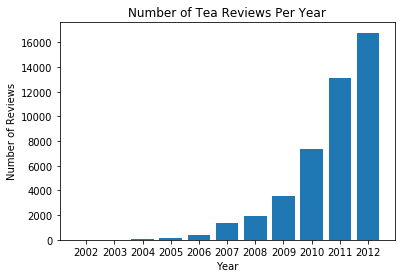

In [73]:
def reviewOverTime(allReviewList, sources):
    numberOfReviews = []
    for review in allReviewList:
        numberOfReviews.append(len(review))
    plt.bar(sources, numberOfReviews)
    plt.title("Number of Tea Reviews Per Year")
    plt.xlabel("Year")
    plt.ylabel("Number of Reviews")
    plt.show()
    
reviewOverTime(allReviewList, reviewYear)

In [74]:
#Changing the data we are using to be from 2007 - 2012
allReviewListSubset, reviewYearSubset = dfSplitter(dataDupRemove, 2007, 2012)

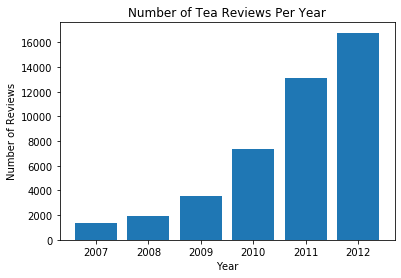

In [75]:
reviewOverTime(allReviewListSubset, reviewYearSubset)

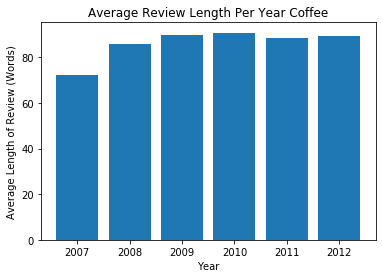

In [76]:
#Looking at length of review over time
def lenOverTime(allReviews, sources):
    avgRevLen = []
    for review in allReviews:
        avgRevLen.append(np.mean(review["ReviewLength"]))
    plt.bar(sources, avgRevLen)
    plt.title("Average Review Length Per Year Coffee")
    plt.xlabel("Year")
    plt.ylabel("Average Length of Review (Words)")
    plt.show()
    
lenOverTime(allReviewListSubset, reviewYearSubset)

In [77]:
#Changing dataframe reviews to a string within a list
def frameToString(dataList):
    output = []
    for data in dataList:
        listed = data["Text"].tolist()
        output.append(' '.join(listed))
    return(output)

combinedReviews = frameToString(allReviewListSubset)

In [78]:
#combinedReviews[0]

In [79]:
#Removing html
import re

def removeHtml(reviewList):
    #Removes html from strings
    cleanOutput = []
    for i in range(0,len(reviewList)):
        cleanOutput.append(reviewList[i].replace('<br /><br />', ''))
        cleanOutput[i] = re.sub('<[^<]+?>', '', cleanOutput[i])
    return(cleanOutput)


combinedReviewsHtml = removeHtml(combinedReviews)

In [80]:
#combinedReviewsHtml[0]

In [81]:
#Remove Punctuation
import string

def removePunc(reviewList):
    punctuation = string.punctuation
    allReviewsClean = []
    for review in reviewList:
        cleanText = ''
        for letter in review:
            if letter not in punctuation:
                cleanText += letter
            else:
                if letter == "'":
                    cleanText += ''
                else:
                    cleanText += ' '
        allReviewsClean.append(cleanText)
    return(allReviewsClean)

combinedReviewsPunc = removePunc(combinedReviewsHtml)


In [82]:
#allCoffeeReviewsPunc[0]

In [83]:
#Tokenizing
from nltk.tokenize import word_tokenize

def makeToken(reviewList, noNum = True):
    allReviewsToken = []
    for review in reviewList:
        allReviewsToken.append(word_tokenize(review))
    if noNum == True:
        cleanTokens = []
        for reviewToken in allReviewsToken:
            cleaned = []
            for token in reviewToken:
                if token.isalpha():
                    cleaned.append(token)
            cleanTokens.append(cleaned)
        return(cleanTokens)
    return(allReviewsToken)

reviewTokens = makeToken(combinedReviewsPunc)

In [84]:
#cleanCoffeeToken[0]

In [100]:
#Removing stopwords
from nltk.corpus import stopwords

#Adding custom stopwords
stopwords = stopwords.words('english')
moreStop = ["coffee", "aa", "aaa", "aaaa", "aaaa", 
            "aaaaa", "aaaaaa", "aaaaaaaaaaaaa", "aaaaaaaaaaaaaaaaaaaargh", "aaaaaaarrrrrggghhh", 
            "aaaaaahhhhh", "aaaaah", "im", "ive"] #Some strange stopwords cluttering the dtm
for word in moreStop:
    stopwords.append(word)
    
#Removing Stopwords that should be kept
stopwords.remove("not")

def removeStop(reviewList, stopwords):
    swRemoved = []
    for review in reviewList:
        cleanToken = []
        for token in review:
            if token not in stopwords:
                cleanToken.append(token)
        swRemoved.append(cleanToken)
    return(swRemoved)

cleanTokens = removeStop(reviewTokens, stopwords)

In [101]:
#Creating the dtm
from sklearn.feature_extraction.text import CountVectorizer

def dtmCreator(corpus, sources):
    cv = CountVectorizer(stop_words = 'english', min_df = 0.2, ngram_range = (1,2))
    corpus_cv = cv.fit_transform(corpus)
    feats = cv.get_feature_names()
    corpus_array = corpus_cv.toarray()
    output  = pd.DataFrame(corpus_array, columns = feats, index = sources)
    return(output)


In [102]:
#Combining tokens back into one big string
def tokenToString(dataList):
    output = []
    for data in dataList:
        output.append(' '.join(data))
    return(output)

cleanTokensJoin = tokenToString(cleanTokens)

In [103]:
#Generating term frequency plot
def termFrequencyPlot(dtm, title):
    mostCommon = dtm.sum(axis=0).sort_values(ascending=False)
    fig, ax = plt.subplots(figsize = (15,10))
    plt.xticks(rotation = 90)
    plt.title(title)
    plt.xlabel("Word")
    plt.ylabel("Count Across Reviews")
    plt.plot(mostCommon[0:50])

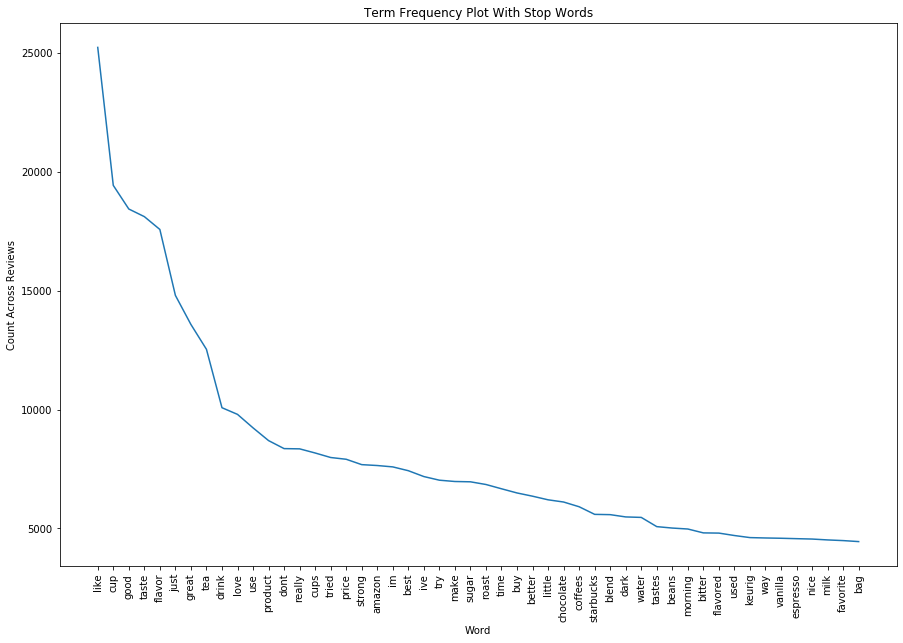

In [104]:
allTokenNoFilter = removeStop(reviewTokens, keyTerms)
allTokenNoFilterJoin = tokenToString(allTokenNoFilter)
dtmStopInclude = dtmCreator(allTokenNoFilterJoin, reviewYearSubset)
termFrequencyPlot(dtmStopInclude,"Term Frequency Plot With Stop Words")

In [105]:
dtm = dtmCreator(cleanTokensJoin, reviewYearSubset)
dtm

,aaah,aacute,aacute sico,ab,ab seen,aback,abandon,abandoned,abandoning,abdomen,...,zola,zolas,zombie,zone,zoom,zoomed,zsweet,zsweet really,zucchini,zucchini bread
2007,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2008,1,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
2009,0,0,0,0,0,1,0,0,0,0,...,12,0,1,0,0,1,0,0,1,0
2010,0,3,2,0,0,1,0,2,0,0,...,0,0,0,4,1,0,4,1,0,0
2011,0,1,1,1,1,4,2,1,1,1,...,3,1,2,2,1,0,1,0,1,1
2012,2,4,0,1,1,4,2,4,2,1,...,0,1,4,5,0,2,16,1,2,2


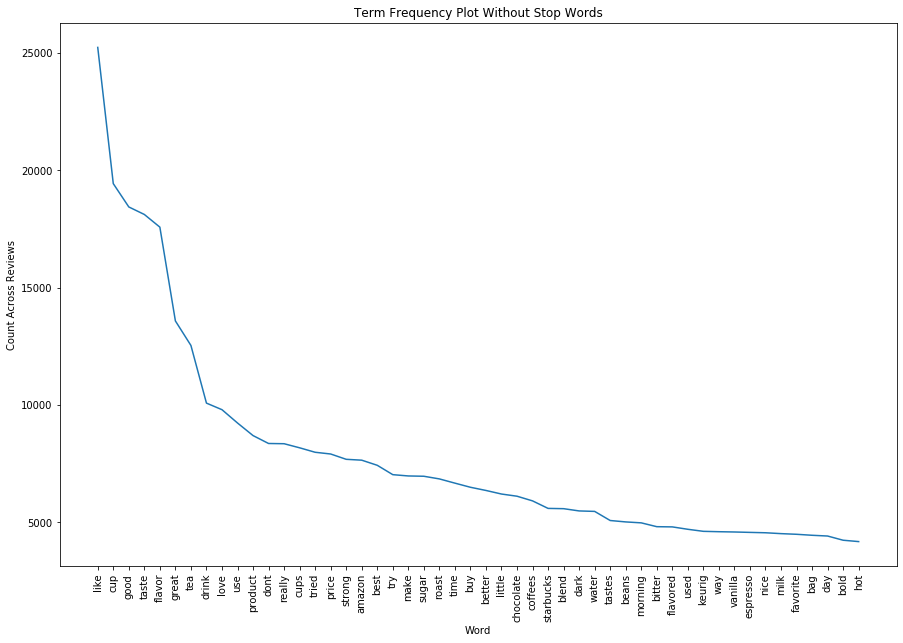

In [106]:
termFrequencyPlot(dtm,"Term Frequency Plot Without Stop Words")

In [107]:
#Looking at counts of words
#counts = dtm.sum(axis=0).sort_values(ascending=False)
#counts[0:50]

In [108]:
#KWIC plots
import nltk
from nltk.text import Text
tokenizer = nltk.tokenize.WhitespaceTokenizer()
t = Text(tokenizer.tokenize(cleanTokensJoin[0]))
t.concordance('starbucks')

Displaying 25 of 111 matches:
aking tea tastes decent enough not starbucks good enough sugar cream fast easy 
rchase continue order thanx forget starbucks peets anything else real deal like
mind review written someone thinks starbucks far far overrated bitter burnt yub
ught wasnt good yuban often wonder starbucks whose find undrinkable son says ac
mmend check u roast em needs folks starbucks not exaggerating say french roast 
 good wouldnt recommend particular starbucks variety like black unless wan na s
ison favorite brands tullys keurig starbucks non keurig find smooth full flavor
ittle weak not distnctive stopping starbucks way work better ones people coffee
e buying store bought coffees even starbucks thought starbucks boy wrong using 
ght coffees even starbucks thought starbucks boy wrong using dont put sugar usu
s definitely lasts longer compared starbucks try never settle anything less rec
urant hooked ever since ever drink starbucks caribou nothing compared one sip s
o find ame

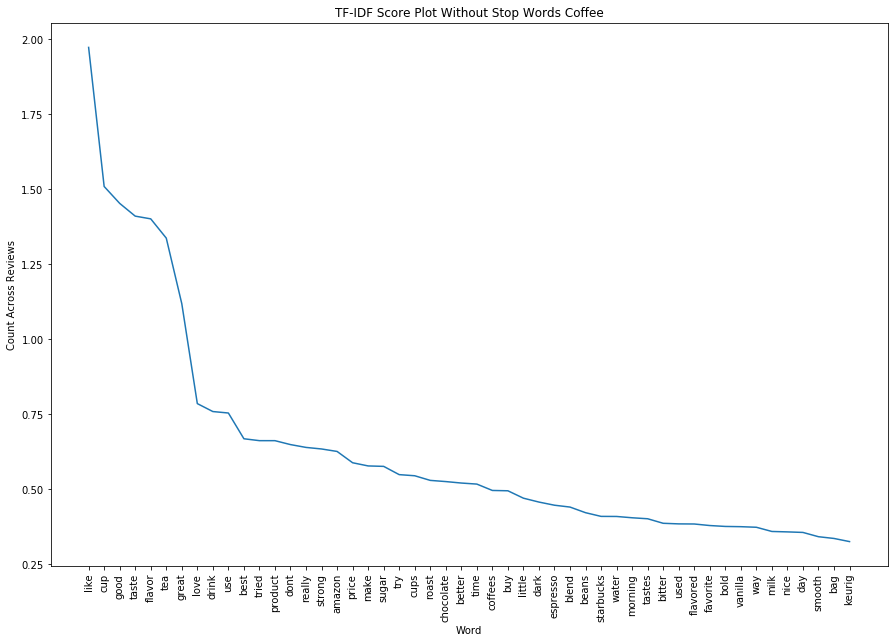

In [109]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

#TF-IDF Scores
def tfIdfCreator(corpus,sources):
    tfidf = TfidfVectorizer(stop_words = 'english', min_df = 0.3)
    corpus_tf = tfidf.fit_transform(corpus)
    feats = tfidf.get_feature_names()
    corpus_array = corpus_tf.toarray()
    dfTf = pd.DataFrame(corpus_array, columns = feats, index = sources)
    return(dfTf)

tfIdf = tfIdfCreator(cleanTokensJoin, reviewYearSubset)
termFrequencyPlot(tfIdf,"TF-IDF Score Plot Without Stop Words Coffee")

In [110]:
#counts = tfIdf.sum(axis=0).sort_values(ascending=False)
#counts[0:15]

In [116]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
#Cosine Similarity
def cosineSim(corpus, sources):
    cv = CountVectorizer(stop_words = 'english', min_df = 0.2)
    corpus_cv = cv.fit_transform(corpus)
    pairwise_sim = cosine_similarity(corpus_cv)
    output = pd.DataFrame(pairwise_sim, columns = sources, index = sources)
    return(output)

cosineSim(cleanTokensJoin, reviewYearSubset)

,2007,2008,2009,2010,2011,2012
2007,1.000000,0.978952,0.978354,0.951179,0.959522,0.953982
2008,0.978952,1.000000,0.986328,0.957314,0.969037,0.963763
2009,0.978354,0.986328,1.000000,0.965624,0.976488,0.969652
2010,0.951179,0.957314,0.965624,1.000000,0.984286,0.976978
2011,0.959522,0.969037,0.976488,0.984286,1.000000,0.990708
2012,0.953982,0.963763,0.969652,0.976978,0.990708,1.000000


In [112]:
from collections import Counter

# unique over total, lower is less diverse
def TTR(tokenized_document):
    total_types = Counter(tokenized_document)
    total_tokens = len(tokenized_document)
    TTR = len(total_types) / total_tokens  
    return TTR

def R(tokenized_document):
    total_types = Counter(tokenized_document)
    total_tokens = len(tokenized_document)
    R = len(total_types) / np.sqrt(total_tokens) 
    return R

def diversityPrint(tokenized_document, source, metric):
    output = []
    if metric == 'ttr':
        for i in range(0,len(tokenized_document)): 
            print(str(source[i]) + ' ttr: ' + str(TTR(tokenized_document[i])))
            output.append(TTR(tokenized_document[i]))
    elif metric == 'r':
        for i in range(0,len(tokenized_document)): 
            print(str(source[i]) + ' R: ' + str(R(tokenized_document[i])))
            output.append(R(tokenized_document[i]))
    return output



#for i in range(0,len(cleanTokens)): 
#    print(str(reviewYearSubset[i]) + ' ttr: ' + str(TTR(cleanTokens[i])))



ttr = diversityPrint(cleanTokens, reviewYearSubset, "ttr")
r = diversityPrint(cleanTokens, reviewYearSubset, "r")

2007 ttr: 0.12557379110859587
2008 ttr: 0.09821164646763228
2009 ttr: 0.06940246672548762
2010 ttr: 0.04613433873501928
2011 ttr: 0.03589924918902564
2012 ttr: 0.031023668115734978
2007 R: 27.428317165506122
2008 R: 27.98463272821174
2009 R: 27.74423829288494
2010 R: 26.361364615011787
2011 R: 27.066510270081846
2012 R: 26.596440677407816


In [5]:
#import plotly.graph_objects as go
#Exporting table of ttr and r scores
#fig = go.Figure(data=[go.Table(header=dict(values=['Lexical Diversity Scores Coffee','TTR', 'R']), cells=dict(values=[reviewYearSubset, ttr, r]))])
#fig.show()

In [114]:
#Importing and exporting functions
import pickle

def picklerOut(data,filename):
    outfile = open(filename,'wb')
    pickle.dump(data, outfile)
    outfile.close()
    
def picklerIn(filename):
    infile = open(filename,'rb')
    data = pickle.load(infile)
    infile.close()
    return(data)